In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import re

In [41]:
titanic = pd.read_csv("titanic.csv")
df = pd.DataFrame(titanic)

In [42]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [66]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.636364,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


C:\Users\Dell\AppData\Local\Temp\ipykernel_14512\3766092599.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],color='b')
C:\Users\Dell\AppData\Local\Temp\ipykernel_14512\3766092599.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='g')


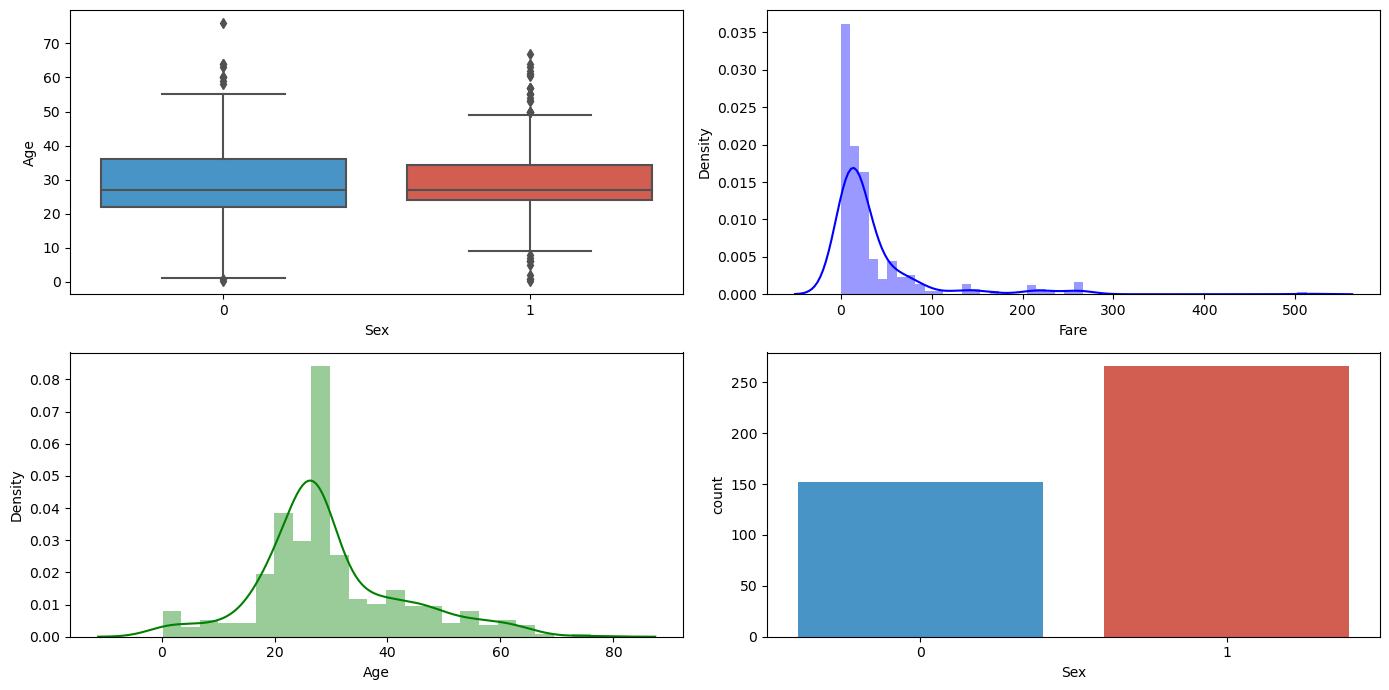

In [81]:
plt.figure(figsize=(14,7))
custom_palette = ["#3498db", "#e74c3c"]
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y='Age', data=df, palette=custom_palette)

plt.subplot(2,2,2)
sns.distplot(df['Fare'],color='b')

plt.subplot(2,2,3)
sns.distplot(df['Age'],color='g')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df, palette = custom_palette)

plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14512\763180119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


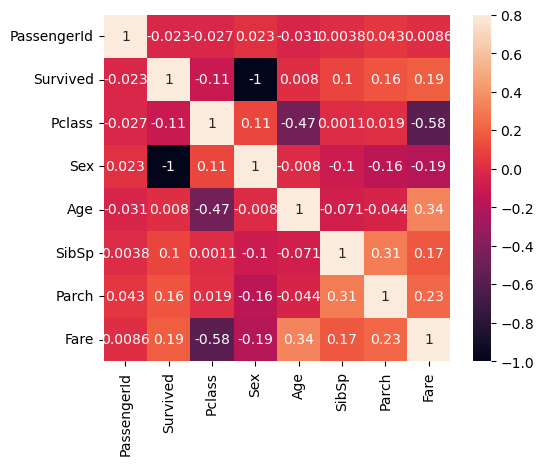

In [78]:
corrmat = df.corr()
fig = plt.figure(figsize = (6, 4.5))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

In [43]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [44]:
df["Age"].fillna(df["Age"].median(), inplace = True)
df["Fare"].fillna(df["Fare"].median(), inplace = True)
df['Cabin'].fillna('Unknown', inplace=True)

In [45]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [46]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Unknown,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,Unknown,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Unknown,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,Unknown,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,Unknown,S


In [48]:
df['Ticket'] = df['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

In [49]:
data = df.drop(["PassengerId", "Name", "Cabin", "Embarked"], axis = 1)

In [50]:
x = data.drop(['Survived'],axis=1)
y = df['Survived']

In [51]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,1,34.5,0,0,330911,7.8292
1,3,0,47.0,1,0,363272,7.0000
2,2,1,62.0,0,0,240276,9.6875
3,3,1,27.0,0,0,315154,8.6625
4,3,0,22.0,1,1,3101298,12.2875


In [52]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [53]:
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [56]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}
#

In [57]:
print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)

(334,)
(84,)
(334, 7)
(84, 7)


In [58]:
nan_values = df.isna().sum()

columns_with_nan = nan_values[nan_values > 0].index
nan_values[columns_with_nan]

Series([], dtype: int64)

In [59]:
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

Logistic Regression - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Random Forest - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Support Vector Machine - Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

   

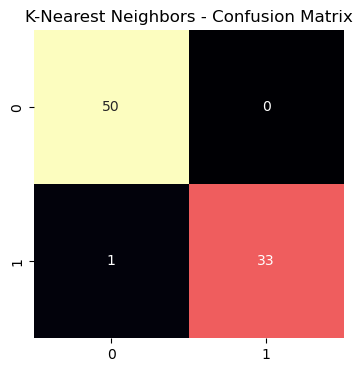

In [65]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", cbar=False)
plt.title(f"{model_name} - Confusion Matrix")
plt.show()